1. Generate a random sample of size 1000 from the Beta(3,2) distribu-tion using the acceptance-rejection method. Graph the histogram of the sample with the theoretical Beta(3,2) density superimposed as the Figure below.

In [ ]:
fx <- function(x){
    if ((x >= 0) && (x <= 1)){
        return(dbeta(x,3,2))
    }
    else return (0)
} 

: 

In [7]:
rejectionK <- function(fx,a,b,K){
    while(TRUE){
        x <- runif(1,a,b)
        y <- runif(1,0,K)
        if (y<fx(x)) return(x)
    }
}

In [15]:
beta.sim <- function(nreps,seed=42){
    set.seed(seed)
    Ob <- rep(0,nreps)
    for(i in 1:nreps){
        Ob[i] <- rejectionK(fx,0,1,2)
    }
    return (Ob)
}

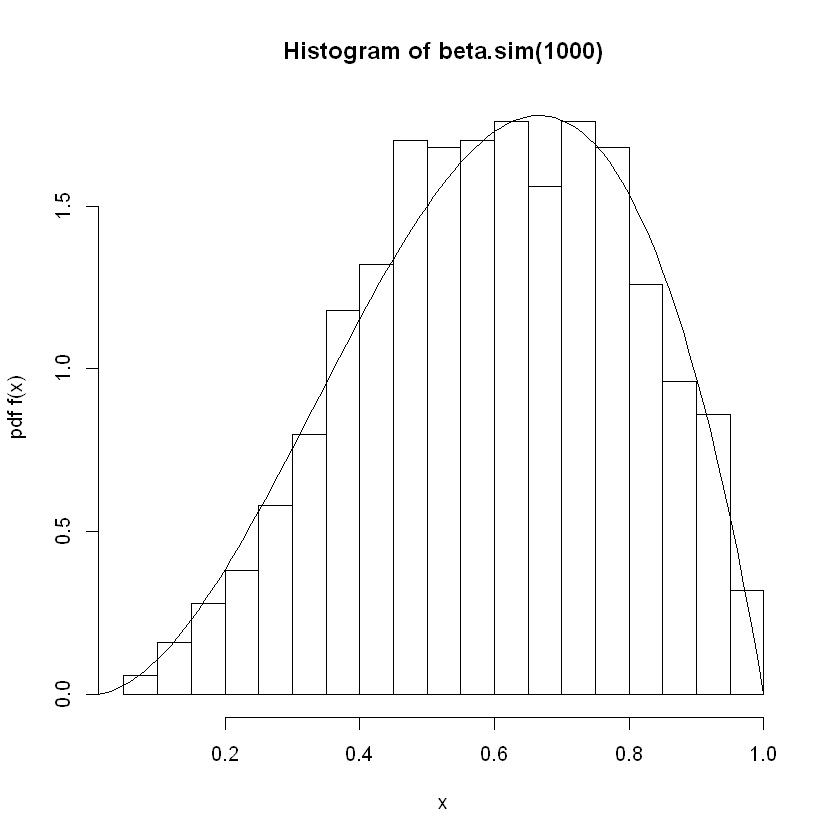

In [41]:
hist(beta.sim(1000),freq=F,breaks=20,xlab="x",ylab="pdf f(x)")
x <- seq(0,1,0.01)
lines(x,dbeta(x,3,2))

2. Generate a random sample of size 1000 from the pdf using the acceptance-rejection method. Graph the histogram of the sample with the theoretical density superimposed.

In [1]:
p2.fx <- function(x,r){
    return (2/(pi*r^2)*sqrt(r^2-x^2))
} 
p2.rejectionK <- function(p2.fx,a,b,K){
    while(TRUE){
        x <- runif(1,a,b)
        y <- runif(1,0,K)
        if (y < p2.fx(x,b)) return(x)
    }
}
p2.sim <- function(nreps,seed=42,r=10){
    set.seed(seed)
    Ob <- rep(0,nreps)
    for(i in 1:nreps){
        Ob[i] <- p2.rejectionK(p2.fx,-r,r,2/(pi*r))
    }
    return (Ob)
}

In [8]:
p2.draw <- function(n,r=10){
    hist(p2.sim(1000,42,r),freq=F,breaks=20,xlab="x",ylab="pdf f(x)",main = paste("Histogram of sim ( R= ", r,")"))
    x <- seq(-r,r,0.01)
    lines(x,p2.fx(x,r))
    return (invisible(NULL))
}

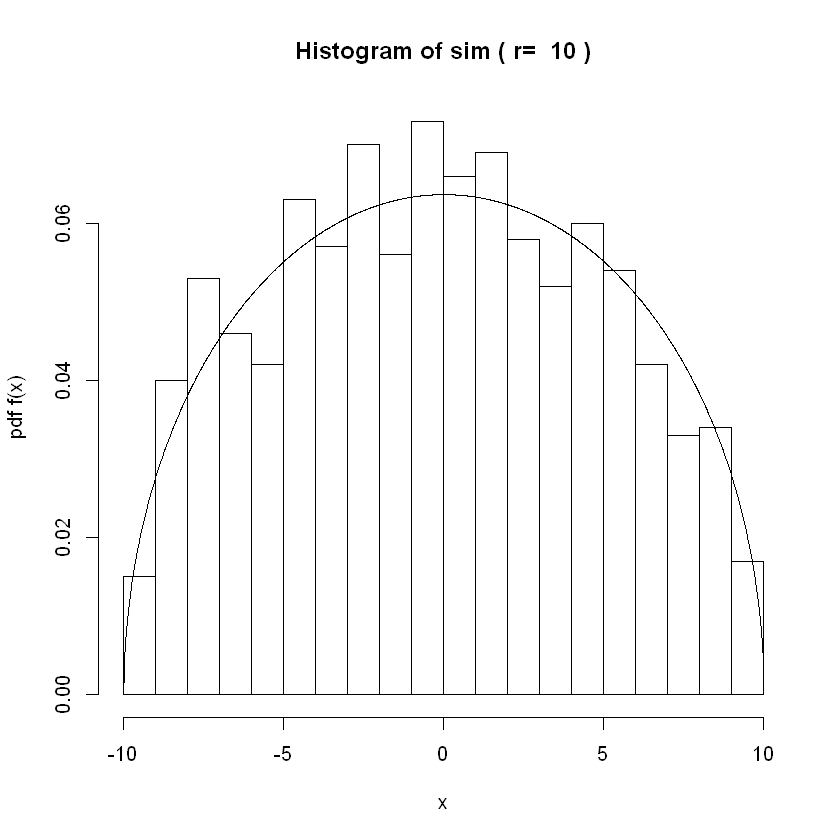

In [13]:
p2.draw(1000,10)

3. The continuous random variable X with positive support is said to have the Pareto distribution if its probability density function is given by fx Generate a random sample of size 1000 from the Pareto distribution with α = 2 and β = 4 using ”inverse transformation method”. Compare the empirical and theoretical distributions by graphing the histogram of the sample and superimposing the Pareto density curve.

In [101]:
p3.fx <- function(x,a=2,b=4){
    return ((b*a^b)/(x+a)^(b+1))
}

In [67]:
#let y=x+a
p3.Fy <- function(y){
    if (y < 2)
        return (0)
    else
        return (1-16/(y)^4)
}

In [99]:
inv.fx <- function(u){
    return (2/(1-u)^(1/4)-2)
}

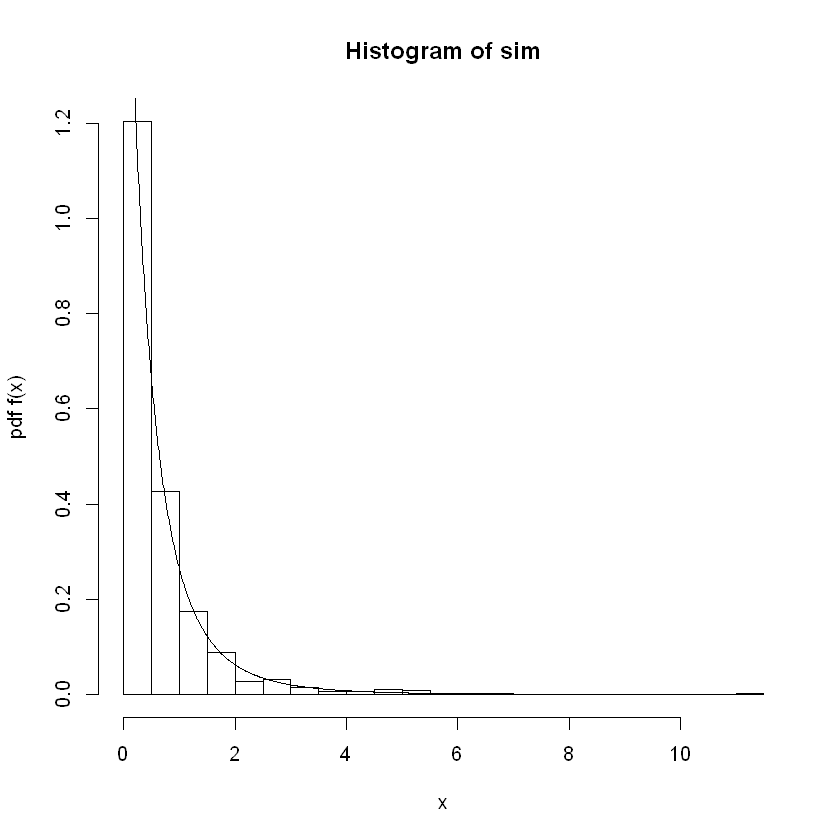

In [102]:
a <- runif(1000)
sim <- inv.fx(a)
hist(sim,freq=F,breaks=20,xlab="x",ylab="pdf f(x)")
x <- seq(0,10,0.01)
lines(x,p3.fx(x))

4. Please compare the efficiencies of two methods for generating the Wishart Distribution with n = 100 and covariance. 

In [191]:
library(MASS)

In [177]:
p4.sim <- function(n){
    R <- matrix(c(1, 0.5,0.5, 2), 2,2)
    mu <- c(0,0) 
    Ob <- c()
    for (i in seq(1,n)){
        X <- mvrnorm(n, mu = mu, Sigma = R)
        Ob <- append(Ob,t(X)%*%X)
    }
    return(Ob)
}

In [178]:
startTime <- Sys.time()
original_method <- p4.sim(100)
endTime <- Sys.time()
print(endTime - startTime)

Time difference of 0.010921 secs


In [185]:
p4.sim.ver2 <- function(n){
    R <- matrix(c(1, 0.5,0.5, 2), 2,2)
    L <- chol(R)
    Ob <- c()
    for (i in seq(1,n)){
        a <- sqrt(rchisq(1,n))
        b <- 0
        c <- rnorm(1,0,1)
        d <- sqrt(rchisq(1,n-1))
        A <- matrix(c(a, b, c, d), 2,2)
        Ob <- append(Ob,L%*%A%*%t(A)%*%t(L))
    }
    return(Ob)
}

In [190]:
startTime <- Sys.time()
base_on_Bartlett_method <- p4.sim.ver2(100)
endTime <- Sys.time()
print(endTime - startTime)

Time difference of 0.003786802 secs


The method which base on Barlett's decomposition is faster than the original version. The execution results, which count in spanning time, are on above.